In [1]:
import sys
if '../' not in sys.path: 
    sys.path.append('../')

In [2]:
from autogrp import AutomataGroupElement, Permutation, AutomataGroup

In [40]:
test = Transducer({'a': [('e', 0, 1), ('a', 1, 0)], 'e': [('e', 0, 0), ('e', 1, 1)]})
test

Transducer with 2 states

In [43]:
a = test.deepcopy() 
a.state('a').is_initial = True 
e = test.deepcopy()
e.state('e').is_initial = True 


In [46]:
a.process([1])

(False, 'a', [0])

In [37]:
a = Automaton({'a': [('e', 1), ('a', 0)], 'e': [('e', 0), ('e', 1)]}).with_output()
e = Automaton({'a': [('e', 1), ('a', 0)], 'e': [('e', 0), ('e', 1)]}).with_output()

a.state('a').is_initial = True 
e.state('e').is_initial = True 

In [39]:
a.process([0])

(False, 'a', [0])

In [5]:
a.process([0, 1, 0, 0])

(False, 'e', [0, 1, 0, 0])

In [6]:
for el in test.states(): 
    print(test.state(el))

'a'
'e'


In [7]:
a = test.deepcopy()
a.state('a').is_initial = True

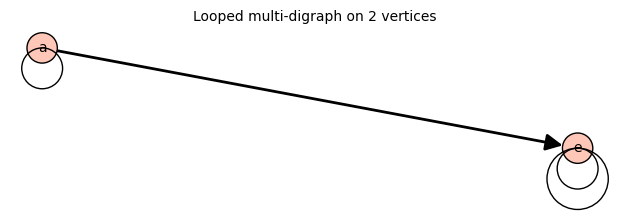

In [8]:
a.graph()

In [9]:
test.input_alphabet

[0, 1]

In [10]:
a.process([1])

(False, 'e', [1])

In [11]:
a.initial_states()

['a']

In [73]:
__group = 0

In [112]:
def transducer2el(transducer): 
    name = transducer.initial_states()[0].label()
    alphabet = transducer.input_alphabet
    res_perm = list(range(len(alphabet)))
    children = []
    for i, letter in enumerate(alphabet): 
        _, child, out = transducer.process([letter])
        out = out[0]
        res_perm[i] = alphabet.index(out)
        children.append(child.label())
    return AutomataGroupElement(name, Permutation(res_perm), children, is_atom=True)
    # return name, res_perm, children

def automaton2group(automaton, name='', force=False): 
    gens = []
    for el in automaton.states(): 
        tmp_el = automaton.deepcopy()
        for in_st in tmp_el.initial_states(): in_st.is_initial = False
        tmp_el.state(el).is_initial = True 
        gens.append(transducer2el(tmp_el))

    if not name: 
        global __group
        name = f'A#{__group}'
        __group += 1
    if force and name in AutomataGroup.all_instances():
        AutomataGroup.clear_group(name)
        
    return AutomataGroup(name, gens)
    # return gens

In [113]:
G = automaton2group(test, force=True)
G


AutomataGroup A#3
over alphabet {'1', '0'}
generated by <A#3(a = (0 1) (e, a)), A#3(e = (1) (e, e))>.
        

In [144]:
import numpy as np
import random

def get_random_automaton(n_states=2, n_alphabet=3): 
    states = 'abcdef'[:n_states]
    alphabet = list(range(n_alphabet))
    aut = {state: [] for state in states}
    for state in states:
        trans = aut[state]
        perm = list(range(n_alphabet))
        np.random.shuffle(perm)
        for letter in alphabet:
            # todo: make random permutation instead of this 
            trans.append((random.choice(states), letter, perm[letter]))
    return Transducer(aut)

In [145]:
G = automaton2group(get_random_automaton(3, 2), name='test2', force=True)
G


AutomataGroup test2
over alphabet {'1', '0'}
generated by <test2(a = (1) (b, c)), test2(b = (0 1) (b, b)), test2(c = (1) (a, a))>.
        

In [150]:
G('aabcbabc') 

test2(aabcbabc = (0 1) (ccbabcba, bbbabbba))